# **POUR VOUS AIDER A CHARGER NOS POIDS ENTRAINES**


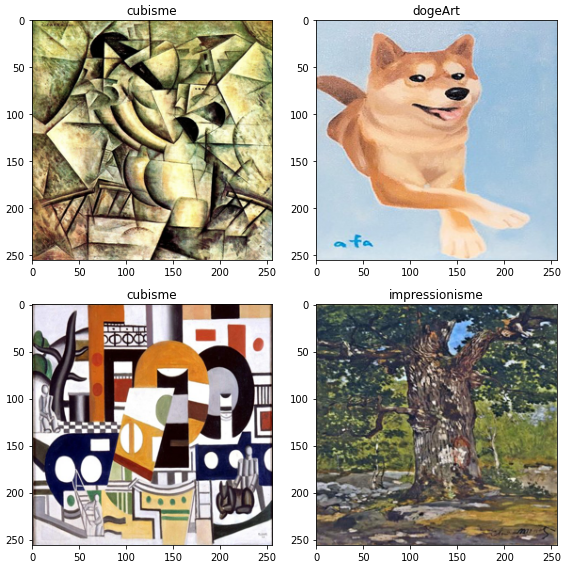

*Réalisé par MOUSSET Thibault, LI Arnaud, MOUSSET Thibault et HEURTEBISE Tom,
Eleves en Deuxième Année à l'ENSEEIHT* 
Rapport remis le 29/05/2022

# Chargement des données

Dans notre projet **Classification de peintures selon leur courant artistiques **, nous avons choisi de classifier des images associées à 4 labels différents : **cubisme**, **impressionisme** et **surrealisme** (finalement réduit à 3 classes puisque suppression du surrealisme).

Nous avons réparti nos images dans 3 ensembles (et donc 3 dossiers): *apprentissage* (3 images par classe), *test* (1 image par classe) et *validation* (1 image par classe). Chacun de ces dossiers contient l'ensemble des images dont le prefixe du nom de fichier est **doge**,**cubisme**, **impressionisme** et **surrealisme**. Ainsi l'étiquette associée à chaque fichier se retrouve dans le nomdu fichier. L'arborescence est résumée sur l'image ci-dessus.

Nous avons chosi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide.

In [ ]:
!git clone https://github.com/Tibo-Mouss/image_database_painting_sans_surrealisme.git


Cloning into 'image_database_painting_sans_surrealisme'...
remote: Enumerating objects: 2944, done.
remote: Total 2944 (delta 0), reused 0 (delta 0), pack-reused 2944
Receiving objects: 100% (2944/2944), 468.02 MiB | 29.55 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (5155/5155), done.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels. 

In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat

path = "./image_database_painting_sans_surrealisme/"     #root of the project
def load_data(data_path, classes, dataset='train', image_size=64):
    """ Chargement des données
    :param data_path : chemin ou se trouve les images
    :param classes : tableau contenant les labels
    :param dataset : nom de l'ensemble concerné (apprentissage, test ou validation)
    :param image_size : taille des images (images_size x image_size)
    """
    num_images = 0
    dirs = sorted(os.listdir(data_path + dataset + '/')) #Renvoit la liste des fichiers 
    num_images = len(dirs)   #Nombre d'images total
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    # Chargement des images, 
    for idx_img in range(len(dirs)):
      item = dirs[idx_img]  #fichier
      if os.path.isfile(data_path + dataset + '/' + item):
        # Ouverture de l'image
        img = Image.open(data_path + dataset + '/' + item)
        # Conversion de l'image en RGB
        img = img.convert('RGB')
        # Redimensionnement de l'image et écriture dans la variable de retour x 
        img = img.resize((image_size,image_size))
        x[idx_img] = np.asarray(img)
        
        # Écriture du label associé dans la variable de retour y => changement par rapport à l'original
        img_name_split = item.split('.')
        class_label = classes.index(img_name_split[0])
        y[idx_img] = class_label
                
    return x, y

Voici le chargement des données à proprement parler.

In [ ]:
labels = ['cubisme', 'dogeArt', 'impressionisme']
IMAGE_SIZE = 256

x_train, y_train = load_data(path, labels, dataset='apprentissage', image_size=IMAGE_SIZE)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=IMAGE_SIZE)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=IMAGE_SIZE)
print(x_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(1572, 256, 256, 3) (1572, 1)
(335, 256, 256, 3) (335, 1)
(337, 256, 256, 3) (337, 1)


Affichage de quelques images pour vérifier que tout s'est bien passé.

[249  58 289 250 267 156 134 103 191]


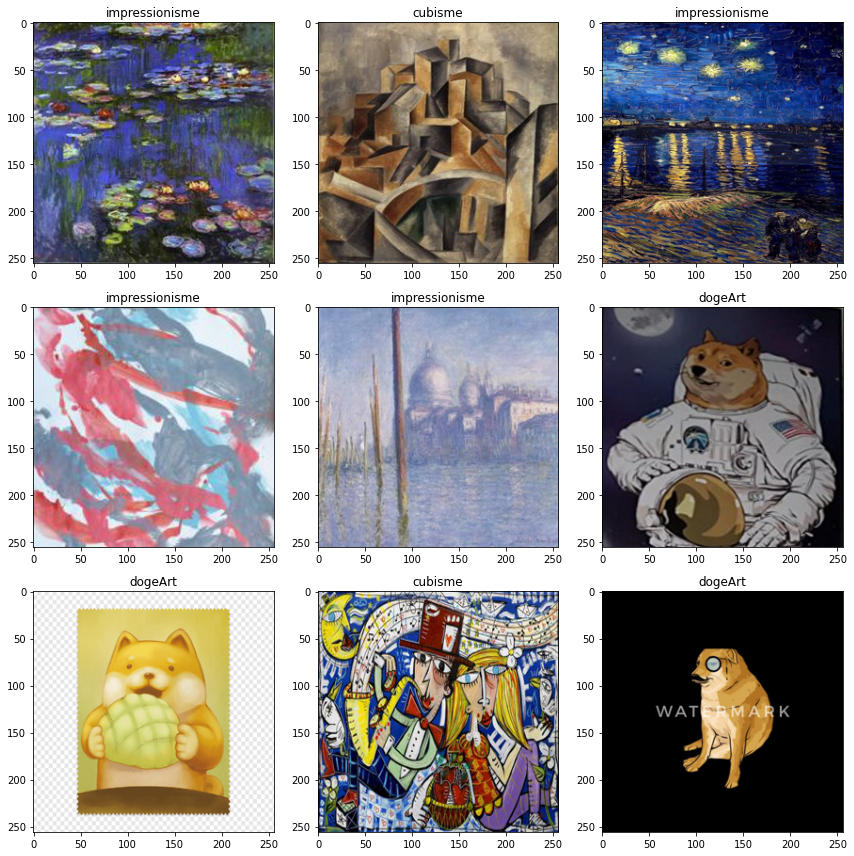

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
suffle_indices = np.random.randint(low=0,high=x_val.shape[0],size=(9))
print(suffle_indices)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    ind = suffle_indices[i]
    image = x_val[ind]
    plt.title(labels[int(y_val[ind])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

# Transfert learning chargement des poids entraines

In [ ]:
from google.colab import drive

#Télécharger les poids depuis un drive google : 

#Monter le drive sur la session google colab => autoriser dans le popup
drive.mount('/content/drive')

#ON suppose que le zip est à la racin du drive
!cp /content/drive/MyDrive/checkpoint2.zip /tmp/
! unzip /tmp/checkpoint2.zip 


#ou autre méthode
#from google.colab import files
#files.upload ...

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Dropout


#VGG BASIQUE juste avec du padding
model3 = Sequential()

model3.add(Conv2D(32,(3,3),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding='same'))
model3.add(Conv2D(32,(3,3),activation='relu', padding='same'))

model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model3.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model3.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))

model3.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
# Couche dense, à 512 neurones
model3.add(Dense(1024,activation='relu'))

model3.add(Dense(3,activation='softmax'))   # Couche de sortie

model3.load_weights("/tmp/checkpoint2/")

## Analyse des résultats

In [ ]:
#prediction du modele sur ensemble de test
y_pred=model3.predict(x_test)

In [ ]:
#Conversion des mechants float en 0, 1 ou 2 (les indices de nos 3 classes)
y_pred_forme = np.argmax(y_pred,axis=1)

In [ ]:
#Conversion des float des etiquettes etablies lors du chargement des images de test en int
y_test_forme = np.concatenate(y_test,axis=0).astype(int)

In [ ]:
#CREATION MATRICE CONFUSION (https://androidkt.com/keras-confusion-matrix-in-tensorboard/#:~:text=%20TensorFlow%20Keras%20Confusion%20Matrix%20in%20TensorBoard%20,boilerplate%20code%20to%20convert%20the%20plot...%20More%20)
import pandas as pd
import numpy as np
import tensorflow as tf

#Création de la matrice de confusion
con_mat = tf.math.confusion_matrix(labels=y_test_forme, predictions=y_pred_forme).numpy()

#Normalisation et ajout des étiquettes 
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = ['cubisme', 'dogeArt', 'impressionisme'], 
                     columns = ['cubisme', 'dogeArt', 'impressionisme'])

NameError: ignored

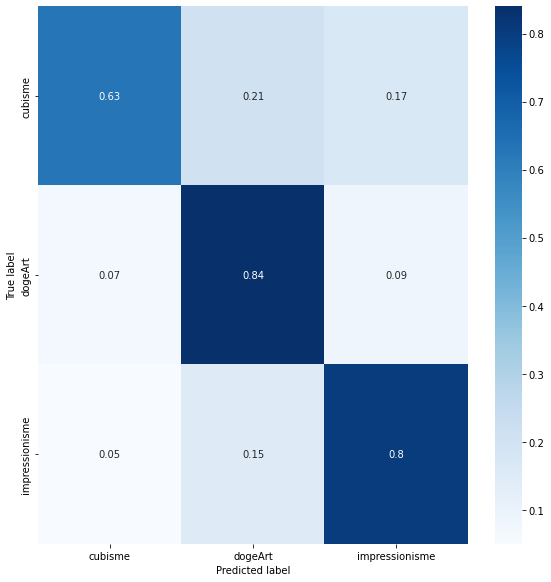

In [ ]:
#Affichage matrice confusion
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Precision globale et par classe
from sklearn.metrics import classification_report
print(classification_report(y_test_forme, y_pred_forme))

              precision    recall  f1-score   support

           0       0.85      0.63      0.72       121
           1       0.67      0.84      0.75       101
           2       0.76      0.80      0.78       115

    accuracy                           0.75       337
   macro avg       0.76      0.76      0.75       337
weighted avg       0.77      0.75      0.75       337

